In [22]:
%load_ext autoreload
%autoreload 2
import pickle
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
# paths
pd_n1000_default = Path('/system/user/beck/pwbeck/projects/regularization/tflearning/outputs_scripts/prediction_depth/PD-cifar10_resnet18-pretrained--230317_124927/prediction_depth_results.p')
pd_n1000_seed1 = Path('/system/user/beck/pwbeck/projects/regularization/tflearning/outputs_scripts/prediction_depth/PD-cifar10-resnet18-seed1--230321_140248/prediction_depth_results.p')
pd_n2000_seed1 = Path('/system/user/beck/pwbeck/projects/regularization/tflearning/outputs_scripts/prediction_depth/PD-cifar10-resnet18-knnsamples2000-knnneighs30-seed1--230322_074832/prediction_depth_results.p')
pd_n5000_seed1 = Path('/system/user/beck/pwbeck/projects/regularization/tflearning/outputs_scripts/prediction_depth/PD-cifar10-resnet18-knnsamples5000-knnneighs30-seed1--230322_074902/prediction_depth_results.p')

In [3]:
def load_dict(path):
    with open(path, 'rb') as f:
        return pickle.load(f)

In [4]:
# reference entropies
pd_n1000_def = load_dict(pd_n1000_default)
entr_n1000 = pd_n1000_def['train']['entropies']
# seed1 entropies
pd_n1000_s1 = load_dict(pd_n1000_seed1)
entr_n1000_s1 = pd_n1000_s1['train']['entropies']
entr_n1000_dict = {'default': entr_n1000, 'seed1': entr_n1000_s1}

In [5]:
# entropies more samples in kNN
entr_n2000_s1 = load_dict(pd_n2000_seed1)['train']['entropies']
entr_n5000_s1 = load_dict(pd_n5000_seed1)['train']['entropies']

In [6]:
def plot_entropy_hist(entropies, title, figsize=(6, 4)):
    fig, ax = plt.subplots(1, 1, figsize=figsize)
    ax.set_title(title)
    if isinstance(entropies, dict):
        for key, entr in entropies.items():
            ax.hist(entr, bins=50, label=key, alpha=0.2)
    else:
        ax.hist(entropies, bins=50)
    ax.set_xlabel('Entropy')
    ax.set_ylabel('Count')
    ax.grid(True)
    ax.legend()
    return fig

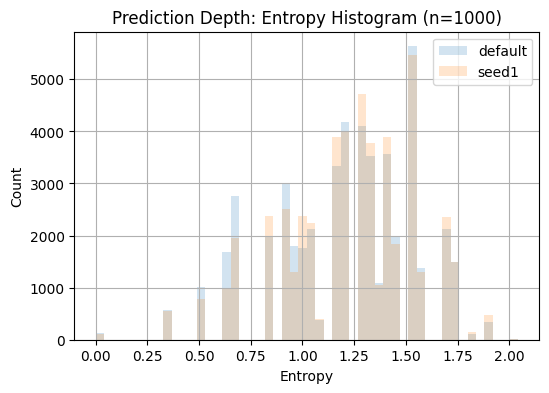

In [7]:
f = plot_entropy_hist(entr_n1000_dict, 'Prediction Depth: Entropy Histogram (n=1000)')

In [8]:
# f = plot_entropy_hist(entr_n1000, 'Prediction Depth, n=1000, default seed')
# f = plot_entropy_hist(entr_n1000_s1, 'Prediction Depth, n=1000, seed=1')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


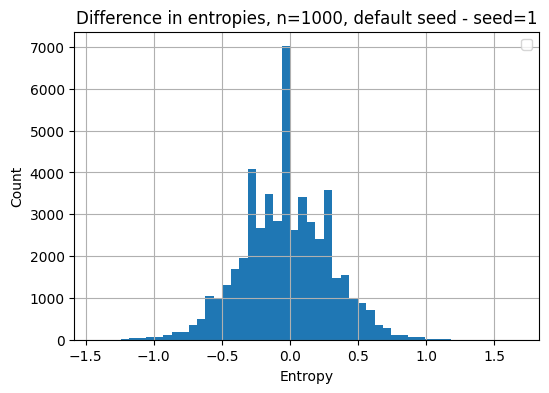

In [9]:
# difference in entropies
f = plot_entropy_hist(entr_n1000-entr_n1000_s1, 'Difference in entropies, n=1000, default seed - seed=1')

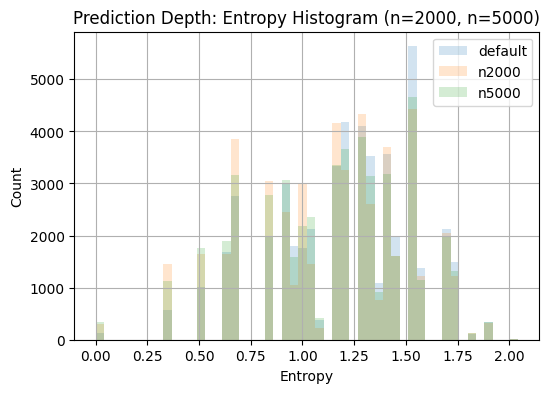

In [10]:
entr_n2000_dict = {'default': entr_n1000, 'n2000': entr_n2000_s1, 'n5000': entr_n5000_s1}
f = plot_entropy_hist(entr_n2000_dict, 'Prediction Depth: Entropy Histogram (n=2000, n=5000)')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


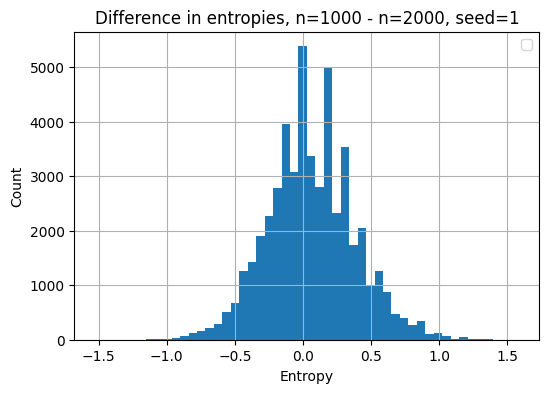

In [11]:
f = plot_entropy_hist(entr_n1000 - entr_n2000_s1, 'Difference in entropies, n=1000 - n=2000, seed=1')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


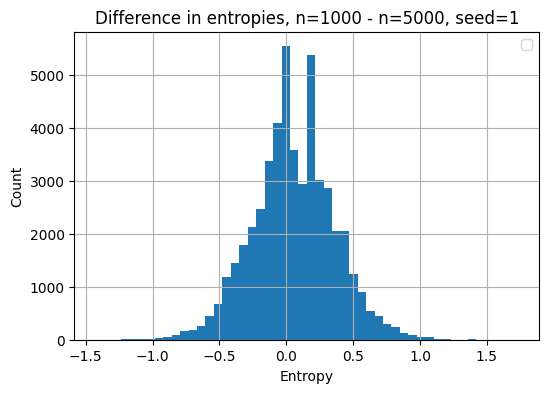

In [12]:
f = plot_entropy_hist(entr_n1000 - entr_n5000_s1, 'Difference in entropies, n=1000 - n=5000, seed=1')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


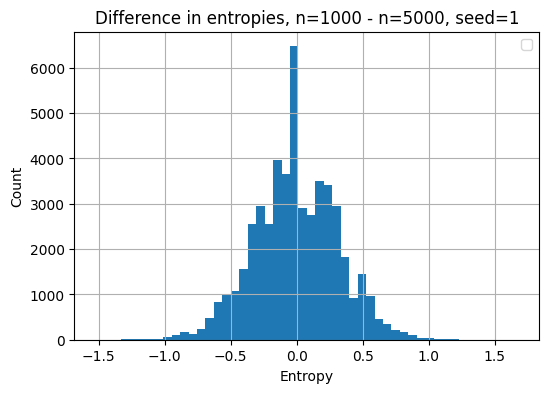

In [13]:
f = plot_entropy_hist(entr_n2000_s1 - entr_n5000_s1, 'Difference in entropies, n=1000 - n=5000, seed=1')

In [17]:
(entr_n2000_s1 - entr_n5000_s1).var(), (entr_n1000 - entr_n5000_s1).var(), (entr_n1000 - entr_n1000_s1).var()

(0.09944220375950603, 0.09509274967050402, 0.10289985404431763)

**Result**: We should average multiple runs (with different samples in the Knn), similar to el2n and grand

In [29]:
np.stack([np.random.randn(100), np.random.randn(100)], axis=1).mean(axis=1).shape

(100,)

In [21]:
pd_n1000_def['train']

{'layer_accs': {'model.act1': 0.21508,
  'model.layer1.0.act2': 0.17894,
  'model.layer1.1.act2': 0.13654,
  'model.layer2.0.act2': 0.16882,
  'model.layer2.1.act2': 0.15574,
  'model.layer3.0.act2': 0.23748,
  'model.layer3.1.act2': 0.22574,
  'model.layer4.0.act2': 0.29094,
  'model.layer4.1.act2': 0.57328},
 'pred_depths': {'correct': array([ 6.,  6., nan, ..., nan,  7.,  7.]),
  'wrong': array([nan, nan,  7., ...,  5., nan, nan])},
 'layer_preds': array([[6, 2, 2, ..., 4, 6, 6],
        [0, 7, 2, ..., 4, 9, 9],
        [8, 8, 0, ..., 0, 8, 0],
        ...,
        [0, 0, 0, ..., 8, 8, 8],
        [8, 0, 8, ..., 8, 8, 1],
        [2, 0, 0, ..., 8, 8, 1]]),
 'labels': array([6, 9, 9, ..., 9, 1, 1]),
 'num_classes': 10,
 'entropies': array([1.31078368, 1.58109375, 0.68696158, ..., 0.63651417, 0.96496292,
        1.21488965])}